1. What is Boosting in Machine Learning? Explain how it improves weak
learners.
   - Boosting in machine learning is an ensemble technique that combines multiple weak learners to create a strong predictive model. A weak learner is a simple model that performs only slightly better than random guessing, such as a shallow decision tree. Boosting works by training models sequentially, where each new model focuses on correcting the errors made by the previous models. Misclassified data points are given higher weight so that the next model pays more attention to them. The final prediction is obtained by combining all the models, typically through a weighted vote or average. This approach reduces bias and improves overall accuracy, allowing the ensemble to capture complex patterns in the data. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost, all of which turn several weak models into a single, strong, and more reliable predictor.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
   - The key difference between AdaBoost and Gradient Boosting lies in how they train models sequentially. In AdaBoost, each new model focuses on the samples that were misclassified by the previous model by giving them higher weights, and the final prediction is made through a weighted majority vote of all models. In contrast, Gradient Boosting trains each new model to predict the residual errors (differences between actual and predicted values) of the previous model, effectively performing gradient descent on a chosen loss function. The final prediction is the sum of all model predictions, gradually correcting errors. In essence, AdaBoost adapts to difficult to classify data points, while Gradient Boosting iteratively minimizes a loss function, making it more flexible and powerful for various types of tasks.

3. How does regularization help in XGBoost?
   - In XGBoost, regularization plays a crucial role in improving the model’s ability to generalize and preventing overfitting, which is a common problem when models become too complex and start fitting noise in the training data. XGBoost incorporates both L1 (Lasso) and L2 (Ridge) regularization directly into its objective function. L1 regularization penalizes the absolute values of the leaf weights in each decision tree, which encourages sparsity by effectively reducing the influence of less important features and, in some cases, setting their weights to zero. L2 regularization, on the other hand, penalizes the squared values of the leaf weights, which prevents the weights from becoming excessively large and helps maintain stability in the model’s predictions. Together, these regularization techniques discourage the algorithm from creating overly deep or complex trees that might fit the noise in the data rather than the underlying patterns. This balance between fitting the data and controlling complexity allows XGBoost to produce models that are both accurate and robust, capable of generalizing well to unseen data. In real-world applications such as finance, healthcare, or fraud detection, this ensures that the model’s predictions are reliable and do not overreact to minor variations in the training dataset, making regularization an essential part of XGBoost’s design.

4. Why is CatBoost considered efficient for handling categorical data?
   - CatBoost is considered highly efficient for handling categorical data because it natively supports categorical features without requiring extensive preprocessing like one hot encoding. Instead of converting categories into binary vectors, which can lead to high dimensional sparse data and increase memory usage, CatBoost uses a technique called ordered target encoding. This method replaces categorical values with statistics derived from the target variable in a way that avoids target leakage and preserves the natural relationships in the data. Additionally, CatBoost implements permutation-driven learning, which ensures that the encoding is computed sequentially and robustly, reducing overfitting even on small datasets. These features make CatBoost particularly effective for datasets with many categorical variables, as it can efficiently handle them while maintaining high predictive performance and reducing the computational cost and complexity compared to traditional methods.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
   - Boosting techniques are preferred over bagging methods in real world applications where achieving high predictive accuracy is crucial and the data may contain complex or subtle patterns. For instance, in fraud detection, boosting can focus on the rare fraudulent cases that are often misclassified, improving detection rates. In credit scoring and risk assessment, it helps capture nuanced patterns in customer behavior to predict loan defaults more accurately, reducing financial risk. In healthcare diagnostics, boosting improves sensitivity and specificity by iteratively correcting errors in disease prediction or patient risk stratification. It is also effective in customer churn prediction, identifying users likely to leave based on complex interactions of demographics and usage data, and in marketing and recommendation systems, optimizing personalized suggestions by focusing on difficult to predict preferences. Overall, boosting is favored in situations where accuracy is more important than interpretability, datasets may have imbalanced classes, and capturing complex nonlinear relationships is essential, whereas bagging is more suited to reducing variance and overfitting.


In [1]:
# 6. Datasets:
# ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
# ● Use sklearn.datasets.fetch_california_housing() for regression
# tasks.
# Question 6: Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier on Breast Cancer dataset: {round(accuracy,4)}")


Accuracy of AdaBoost Classifier on Breast Cancer dataset: 0.9708


In [2]:
# 7.: Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score

# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,    # Number of boosting stages
    learning_rate=0.1,   # Step size shrinkage
    max_depth=3,         # Maximum depth of each tree
    random_state=42
)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score of Gradient Boosting Regressor: {round(r2,4)}")


R-squared score of Gradient Boosting Regressor: 0.7803


In [4]:
# 8.  Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings('ignore')

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Best parameters: {best_params}")
print(f"Accuracy of XGBoost Classifier on Breast Cancer dataset: {round(accuracy,4)}")


Best parameters: {'learning_rate': 0.3}
Accuracy of XGBoost Classifier on Breast Cancer dataset: 0.9649


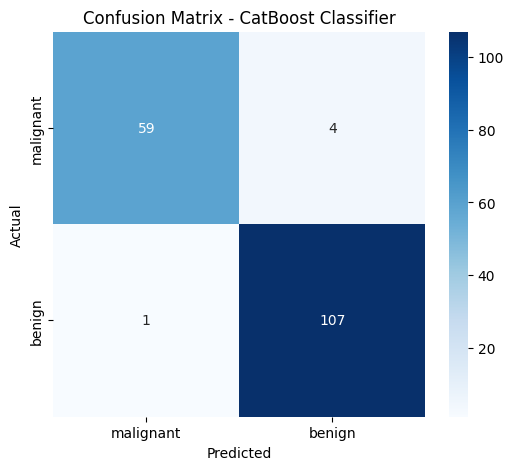

In [7]:
# 9.  Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn

# Import libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the CatBoost Classifier
catboost_model = CatBoostClassifier(
    iterations=100,       # Number of trees
    learning_rate=0.1,    # Learning rate
    depth=3,              # Depth of each tree
    verbose=0,            # Silent mode
    random_state=42
)
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()


10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
    - To predict loan default using boosting techniques, the first step is data preprocessing, which involves handling missing values through imputation, encoding categorical variables or using CatBoost which handles them natively, and addressing class imbalance with methods like SMOTE or class weighting. I would choose CatBoost for its efficiency with categorical features and ability to reduce overfitting, though XGBoost is also a strong option for high predictive accuracy. Hyperparameter tuning would focus on parameters such as learning rate, tree depth, and number of estimators, using GridSearchCV with stratified cross-validation to ensure the model generalizes well. For evaluation, metrics like ROC-AUC, precision, recall, and F1-score are preferred due to the imbalanced dataset, as they better capture the trade off between false positives and false negatives. Boosting models provide significant business benefits by accurately identifying high risk borrowers, enabling the company to manage credit risk, minimize losses, and make informed lending decisions while optimizing profitability.


Best Parameters: {'depth': 3, 'iterations': 200, 'learning_rate': 0.05}
ROC-AUC: 0.9963
Precision: 0.9375
Recall: 0.9813
F1-score: 0.9589


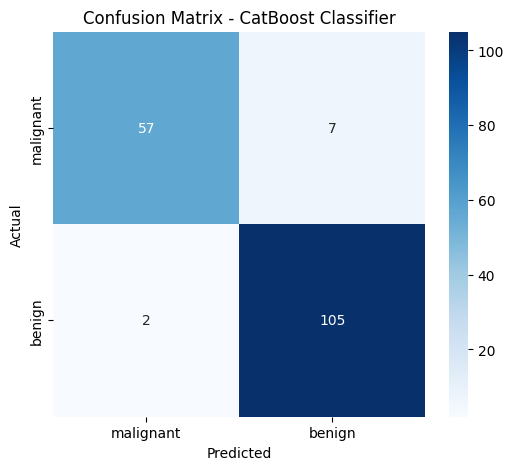

In [9]:


# Import necessary libraries
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For demonstration, using Breast Cancer dataset as a placeholder for loan dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Identify categorical features (example placeholder)
cat_features = []  # Placeholder; replace with actual categorical columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=4,
    eval_metric='AUC',
    random_state=42,
    verbose=0
)

# Hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [3, 4, 5],
    'iterations': [200, 500]
}

grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

grid_search.fit(X_train, y_train, cat_features=cat_features)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate performance
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"ROC-AUC: {roc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()
